# VALUE AT RISK CALCULATION

## Abstract

Value Risk (VaR) is a statistical technique used to measure and quantify the level of financial risk in a company or investment portfolio for a specific time period. Banks (in particular commercial banks and investment banks) estimate VaR to determine the extent and the ratio of occurrence of potential losses in their portfolio. For companies, this technique can be applied to portfolios in order to measure the risk of the company in their investment strategies. In our project, we analyze the stocks of four technology companies in the United States, including Apple Inc. (AAPL), Alphabet Inc. (GOOG), Microsoft Corporation (MSFT) and International Business Machines Corporation (IBM). The data are collected from daily close prices from December 12th, 2016 to December 12th, 2017.

## Introduction

Our research includes parts. At first, we build the portfolio by using the equal weighted method to check normality of the data. The second, we estimate the Value at Risk (VaR) and the Conditional VaR (CVaR) by using 3 approaches, including Historical method, the mean-variance method and the Monte Carlo simulation method. The third step, we use the Extreme Value Theory to estimate the VaR and CVaR. At the last step, we assume the portfolio follow a power-law distribution and run the data with Monte Carlo simulation.

We use R programming language to support for our analysis.

#### Build an equal weighted portfolio from the last recent year and plot the portfolio value, using a starting portfolio value of 100.

In [1]:
#Input data
idd <- "1NfuyR8IdCvLHkqb4nsOZhUD75vQzG1Vg"
data <- read.csv(sprintf("https://docs.google.com/uc?id=%s&export=download", idd))

The data have 253 rows per stock, each row is the daily close price of the four stocks.

In [2]:
head(data)

Date,AAPL,GOOG,IBM,MSFT
2016-12-12,111.5069,789.27,159.3205,60.81215
2016-12-13,113.3670,796.10,162.0063,61.60445
2016-12-14,113.3670,797.07,162.2181,61.31101
2016-12-15,113.9870,797.85,161.7464,61.21319
2016-12-16,114.1346,790.80,160.5046,60.93930
2016-12-19,114.7940,794.20,160.4565,62.23048


In [3]:
data$Date <- as.Date(data$Date, format="%Y-%m-%d")
data <- data[order(data$Date),]
head(data)

Date,AAPL,GOOG,IBM,MSFT
2016-12-12,111.5069,789.27,159.3205,60.81215
2016-12-13,113.3670,796.10,162.0063,61.60445
2016-12-14,113.3670,797.07,162.2181,61.31101
2016-12-15,113.9870,797.85,161.7464,61.21319
2016-12-16,114.1346,790.80,160.5046,60.93930
2016-12-19,114.7940,794.20,160.4565,62.23048


In [4]:
n <- nrow(data)

For easy calculation, we change the variables by assigning them to the new variables respectively.

In [5]:
# 1. BUILD A EQUALLY WEIGHTED PORTFOLIO + PLOT PORTFOLIO VALUE #
## Change Variable ##
IB <- data$IBM
AP <- data$AAPL
GG <- data$GOOG
MS <- data$MSFT

#### Build an equal weighted portfolio from the last recent year and plot the portfolio value, using a starting portfolio value of 100

Equal weight is one of three common types of weighting used as a tool for measuring the health of the stock market, including price-weighted average (Dow Jones Industrial Average ‘DJIA’), Market-value weighted (S&P 500, Nasdaq 100, the Wilshire 5000) and Equal weighted applied by the Value Line Index.

Equal weight figures the cumulative of the arithmetic average of the percentage changes in price for all stocks in the index. It means that investing the same amount of money in each stock, then rebalancing each period.

For the Equal Weight Index, our Index begins with shares in each of N stocks according to:

Stock-Shares: $S_k(0) = \frac{A/N}{P_k(0)}$ 

Stock-Value: $V_k(0) = \frac{k}{N}$

Index-Value: $V(0) = \sum{V_k(0) = A^*}$

where $P_1(0), P_2(0), ... P_N(0)$, denote the $N$ stock prices at time $= 0$ and $A$ denote the initial value of the portfolio.

If the prices of the $N$ stocks change from day to day or month to month (meaning time $= 0$ to time $= 1$ etc.) from $P(0)$ to P$(1)$, for example, the value of each component changes too, according to:

Stock - value: $V_k(1) = \frac{(A/N)P_K(1)}{P_K(0)}$ : multiplying the number of shares by the new stock price, and the total value of portfolio changes to:

Index-Value: $V(1) = \sum{V_k(1)} = (A/N)\sum{\frac{P_k(1)}{P_K(0)}}$

The below histogram shows the density of the portfolio value by the equal weighted method. We can see that the shape of the graph does not follow the Normal Distribution.

At first, we initialize the initial portfolio value and the weighted value. The initial value of portfolio is 100 and the weighted value of stocks is equal and equal to 25.

In [7]:
## Initial Portfolio Value + Weight ##
PVO <- c(100)
KIB <- c(25/IB[1])
KAP <- c(25/AP[1])
KGG <- c(25/GG[1])
KMS <- c(25/MS[1])

Then we calculate the value of the portfolio in the second day when the price of stocks has been changed. At this time we rebalance the weights of portfolio to maintain 25% in each of the four stocks.

In [8]:
## Portfolio + Weight ##
for (i in 2:n) {
  #Calculate Portfolio Value#   
    PVO[i] <- KIB[i-1]*IB[i]+KAP[i-1]*AP[i]+KGG[i-1]*GG[i]+KMS[i-1]*MS[i]
  #Rebalance Portfolio#     
    KIB[i] <- PVO[i]/(4*IB[i])
    KAP[i] <- PVO[i]/(4*AP[i])
    KGG[i] <- PVO[i]/(4*GG[i])
    KMS[i] <- PVO[i]/(4*MS[i])
}

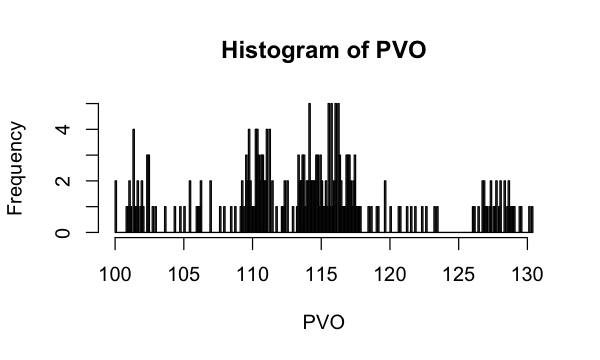

In [9]:
options(repr.plot.width = 5, repr.plot.height = 3) #set up ploting size
hist(PVO, 253)

Conducting this step we can calculate the values the portfolio for the other days later. Figure 2: The portfolio value by the equal weighted method

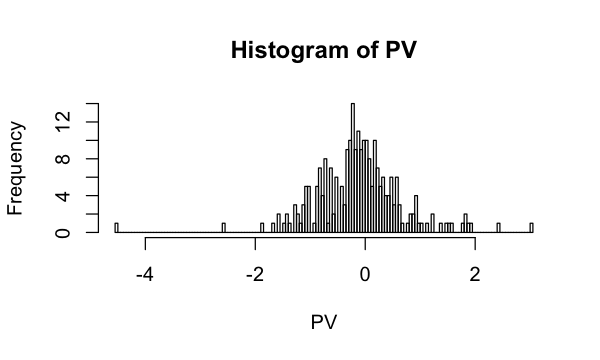

In [10]:
## Portfolio Return ##
PV <- PVO
PV[1] <- 0
PV[2:n] <- (PVO[2:n]-PVO[1:(n-1)])*(-1)
hist(PV,253)

The above histogram shows the value of the portfolio follow the Normal Distribution. We can see that the shape has a long right tail, it means that the distribution is skewed and the mean of the portfolio is also skewed to the right.

#### Calculate VaR and CVaR of the portfolio

There are three primary methods used for calculating Value at Risk (VaR), including the Historical simulation method, the Mean Variance method and the Monte Carlo simulation method. Choosing to use any method which depends on the data and the computational techniques.

In general, to specify the value at risk metric, we must identity three things:

- The period of time over which a possible loss will be calculated. This is called the value at risk horizon. In our research, the value at risk horizon is one trading day.

- A quantile of that possible loss or the confidence level. For instances, the value at risk of the portfolio is expressed as a 0.99 quantile of loss.

- The currency in which the possible loss is denominated. This is called the base currency. In our research, the base currency is USD

#### The Historical method

In [11]:
# 2. CALCULATE VaR, CVaR USING HISTORICAL, MEAN-VARIANCE, MONTE CARLO METHODS#
## Historical Method ##
alpha_historical <- 0.99
PV_historical <- PV[order(PV,decreasing = FALSE)]
m_historical <- ceiling(n*(1-alpha_historical))
VAR_historical <- PV_historical[m_historical]
ES_historical <- mean(PV_historical[PV_historical<VAR_historical])

In [12]:
alpha_historical
m_historical
VAR_historical
ES_historical

[1] 0.99

[1] 3

[1] -1.851052

[1] -3.539783

#### The Variance-covariance method

In [13]:
## Mean-Variance Method ##
alpha_meanvar <- 0.99
mu_meanvar <- mean(PV)
sigma_meanvar <- sd(PV)
VAR_meanvar <- mu_meanvar-2.33*sigma_meanvar
ES_meanvar <- mu_meanvar-sigma_meanvar*(exp(-2.33^2/2)/(sqrt(2*pi)*(1-alpha_meanvar)))

In [14]:
alpha_meanvar
mu_meanvar
sigma_meanvar
VAR_meanvar
ES_meanvar

[1] 0.99

[1] -0.1199199

[1] 0.7837438

[1] -1.946043

[1] -2.191079

#### The Monte Carlo simulation method

This method involves building the model for future stock price returns and running multiple hypothetical trials through the model by using the past events to model what might happen in the future. This concept is the basis of the Monte Carlo simulation method of calculating VaR.

In [15]:
## Monte Carlo Method ##
alpha_MC <- 0.99
mu_MC <- mean(PV)
sigma_MC <- sd(PV)
N <- 100000
X_prime <- rnorm(N,mu_MC,sigma_MC)
PV_MC <- X_prime[order(X_prime,decreasing=FALSE)]
m_MC <- ceiling(N*(1-alpha_MC))
VAR_MC <- PV_MC[m_MC]
ES_MC <- mean(PV_MC[PV_MC<VAR_MC])

In [16]:
alpha_MC
mu_MC
sigma_MC
N
m_MC
VAR_MC
ES_MC

[1] 0.99

[1] -0.1199199

[1] 0.7837438

[1] 1e+05

[1] 1001

[1] -1.940713

[1] -2.201902

Conditional VaR (CVaR) or Expected shortfall is the expected loss given that the returns are already below the pre-specified worst case scenario. Expected shortfall, like VAR, is a function of two parameters: N (the time horizon in days) and X% (the confidence level). It is the expected loss during an N-day period, conditional that the loss is greater than the Xth percentile of the loss distribution.(

#### Compare the results of three approaches

The value of VaR using three different approaches with the confidence of 99%. We can realize that the VaR of the historical simulation is higher than the two other two methods, because the price changes do not perfectly follow the normal distribution. The Monte Carlo method basically samples from the mean variance method, so the results will be similar to the values of the mean variance method. Of course, if the sampling was repeated for more than 100000 times, the resulting value would be closer to the value of the mean variance. The absolute value of CVar of the historical method is higher than the other two method. It means that the highest loss which may happen at 99% confidence is 3.539 USD.

In [17]:
print("Historical simulation")
VAR_historical
ES_historical
print("Mean Variance")
VAR_meanvar
ES_meanvar
print("Monte Carlo")
VAR_MC
ES_MC

[1] "Historical simulation"


[1] -1.851052

[1] -3.539783

[1] "Mean Variance"


[1] -1.946043

[1] -2.191079

[1] "Monte Carlo"


[1] -1.940713

[1] -2.201902

#### Estimate VaR and CVaR of the portfolio by using the Extreme-Value-Theory

Extreme-Value-Theory (EVT) is used to study extreme risks on large portfolios of individual contracts and to predict the occurrence and size of extreme losses.

#### The Key Result

The key result in EVT shows that the tails of a wide range of different probability distributions share common properties.

Suppose that $F(v)$ is the cumulative distribution function for a variable $v$ and that $u$ is a value of $v$ in the right-hand tail of the distribution. The probability that $v$ lies between $u$ and $u + y (y > 0)$ is $F(u + y) − F(u)$. The probability that $v$ is greater than $u$ is $1 − F(u)$. Define Fu(y) as the probability that v lies between $u$ and $u + y$ conditional on $v > u$. This is $$F_u(y) = \frac{F(u+y)-F(u)}{1-F(u)}$$

The variable $Fu(y)$ defines the right tail of the probability distribution. It is the cumulative probability distribution for the amount by which v exceeds u given that it does exceed $u$.

For a wide class of distributions $F(v)$, the distribution of $Fu(y)$ converges to a generalized Pareto distribution as the threshold $u$ is increased. The generalized Pareto (cumulative) distribution is 
$$G_{\xi,\beta}(y) = 1- (1 + \xi\frac{y}{\beta})^{-1}$$.

The distribution has two parameters that have to be estimated from the data. These are $\xi$ and $\beta$. The parameter $\xi$ is the shape parameter and determines the heaviness of the tail of the distribution. The parameter $\beta$ is a scale parameter. For most financial data, $\xi$ is positive and in the range 0.1 to 0.4.

#### Estimating $\xi$ and $\beta$

The parameters $\xi$ and $\beta$ can be estimated using maximum likelihood methods. The probability density function, $g_{\xi,\beta}(y)$ , is calculated by differentiating $G_{\xi,\beta}(y)$ with respect to $y$. It is 
$$g_{\xi,\beta}(y) = \frac{1}{\beta}(1 + \xi\frac{y}{\beta})^{-\frac{1}{\xi}-1}$$



We first choose a value for $u$. We then rank the observations on $v$ from the highest to the lowest and focus our attention on those observations for which $v > u$. Suppose there are n u such observations and they are $v_i(1 ≤ i ≤ n_u)$. The likelihood function (assuming that $\xi \to 0)$ is 

$$\displaystyle\prod_{i=1}^{n_u}\frac{1}{\beta}\big[1 + \frac{\xi(v_i - u)}{\beta}\big]^{-\frac{1}{\xi}-1}$$.

Maximizing this function is the same as maximizing its logarithm:

$$ \displaystyle\sum_{i=1}^{n_u} ln \bigg[ \frac{1}{\beta}\big[1 + \frac{\xi(v_i - u)}{\beta}\big]^{-\frac{1}{\xi}-1} \bigg] $$


Standard numerical procedures can be used to nd the values of $\xi$ and $\beta$ that maximize this expression.

#### Estimating the Tail of the Distribution

The probability that $v > u + y$ conditional that $v > u$ is $1 − G_{\xi,\beta}(y)$ . The probability that $v > u$ is $1 − F(u)$. The unconditional probability that $v > x$ (when $x > u$) is therefore
$$ [1 − F (u)][1 − G_{\xi,\beta}(x-u)] $$

If n is the total number of observations, an estimate of $1 − F(u)$, calculated from the empirical data, is $n_u/n$ . The unconditional probability that $v > x$ is therefore 
$$ Prob(v>x) = \frac{n_u}{n} \big[ 1 − G_{\xi,\beta}(x-u) \big] = \frac{n_u}{n} \big[ 1 - \xi\frac{x-u}{\beta}\big]^{-\frac{1}{\xi}} \quad (1)$$ 

#### Equivalence to the Power Law

If we set $u = \frac{\beta}{\xi}$, equation (1) reduces to
$$ Prob(v>x) = \frac{n_u}{n} \big[ \frac{\xi x}{\beta} \big]^{-\frac{1}{\xi}} $$
This is $Kx^{-\alpha}$ where $K = \frac{n_u}{n} \big[ \frac{\xi}{\beta} \big]^{-\frac{1}{\xi}}$

#### The Left Tail

For the left tail of the probability distribution, we will work with $− v$ instead of $v$.

#### Calculation of VaR and ES (CVaR)

The VaR with a confidence level of $q$ is given by the equation:
$$ VaR = u + \frac{\beta}{\xi}\Bigg[ \Big[ \frac{n}{n_u}(1-q) \Big]^{-\xi} -1 \Bigg] $$

The expected shortfall is given by
$$ ES = \frac{VaR + \beta - \xi u}{1-\xi} $$

We conduct the steps of calculation by R tools as below. We care to two value of alpha, 99% and 99.9%.
- Arrange the portfolio value

- Determine the value of u and n u

- Define the Likelihood function

- Estimate β & ξ

- Calculate Var and CVar

In [18]:
# 3. CALCULATE VaR, CVaR USING EXTREME VALUE THEORY #
alpha_EVT_1 <- 0.99
alpha_EVT_2 <- 0.999

In [19]:
##alpha = 0.99##
## Sort Portfolio Value ##
PV_sorted <- PV[order(PV,decreasing=FALSE)]
PV_EVTN_1 <- floor(n*0.95)
PV_EVT_1 <- PV_sorted[(PV_EVTN_1+1):n]

In [20]:
## Determine u and nu ##
u <- PV_sorted[PV_EVTN_1]
nu <- length(PV_EVT_1)

In [21]:
## Define Likelihood function ##
LL <- function(beta,xi){
    Q <- 0
    for (i in 1:nu){
        Q <- Q+log((1/beta)*(1+xi*(PV_EVT_1[i]-u)/beta)^(-1/xi-1))
        }
    return(-Q)
}

In [22]:
library(stats4)

In [23]:
## Estimate beta, xi ##
options(warn = -1) 
#mmllee <- mle(LL,start = list(beta=40,xi=0.3))
beta <- 0.9127848
xi <- -0.3771784
VAR_EVT_1 <- (u+(beta/xi)*(((n/nu)*(1-alpha_EVT_1))^(-xi)-1))
ES_EVT_1 <- ((VAR_EVT_1+beta-xi*u)/(1-xi))
VAR_EVT_2 <- (u+(beta/xi)*(((n/nu)*(1-alpha_EVT_2))^(-xi)-1))
ES_EVT_2 <- ((VAR_EVT_2+beta-xi*u)/(1-xi))

In [24]:
VAR_EVT_1 
ES_EVT_1 
VAR_EVT_2 
ES_EVT_2 

[1] 2.219117

[1] 2.576613

[1] 2.976738

[1] 3.126738

In [25]:
print("α = 99%:")
PV_EVTN_1
u
nu
VAR_EVT_1 
ES_EVT_1 
print("α = 99.9%:")
VAR_EVT_2 
ES_EVT_2

[1] "α = 99%:"


[1] 240

[1] 1.104395

[1] 13

[1] 2.219117

[1] 2.576613

[1] "α = 99.9%:"


[1] 2.976738

[1] 3.126738

Both of VaR and CVaR of 99.9% is higher than 99%. The reason is the higher the confidence, the higher the accuracy. According to the above result, CVaR and VaR increase with the confidence levels, the CVaR always is greater than VaR.

#### Fit the distribution with real data & using Monte Carlo to calculate VaR and CVar

We do the following steps:

- Calculate cc and c

- Sort out the data for Normal Distribution (PV_ND) and the Power Law Distribution Left and Right

- Estimate the parameters of Normal Distribution and Power-law Distribution

- Combine Data

- Compute VAR, CVAR

In [26]:
## 4. FIT THE DISTRIBUTION WITH REAL DATA & USING MONTE CARLO TO CALCULATE VaR, CVaR ##
library(igraph)
library(LaplacesDemon)
library(fitdistrplus)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

Loading required package: MASS
Loading required package: survival
Loading required package: npsurv
Loading required package: lsei


In [27]:
## Calculate (cc,c)
alpha_PLD <- (1-0.95)/2
cc <- floor(n*alpha_PLD)+1
c <- n-cc

In [28]:
## Sort out Data for Normal Distribution (PV_ND) and Power Law Distribution Left and Right (PV_PLDL and PV_PLR) ##
PV_ND <- PV_sorted[cc:c]
PV_ND_Matrix <- as.matrix(PV_ND) # Convert to Matrix
PV_PLD_Left <- PV_sorted[1:(cc-1)]
PV_PLD_Right <- PV_sorted[(c+1):n]

In [29]:
## Estimate Parameters of Normal Distribution and Power-law Distribution ##
# Generate Normal Distribution)
f_ND <- apply(PV_ND_Matrix, 2,  fitdist, "norm")
mu_ND <- -0.1299441
sigma_ND <- 0.5924408
PV_sim_ND<-rnorm(95000,mu_ND,sigma_ND)
# Generate Power Law #
PV_sim_PLD_Left <- rgpd(2500,PV_sorted[cc],beta,xi)
PV_sim_PLD_Right <- rgpd(2500,PV_sorted[c],beta,xi)

In [30]:
## Combine Data ##
PVMC <- c(PV_sim_PLD_Left,PV_sim_ND,PV_sim_PLD_Right)

In [31]:
## Compute VAR, CVAR ##
alpha_NMC <- 0.99
PV_NMC <- PVMC[order(PVMC,decreasing = FALSE)]
m_NMC <- ceiling(n*(1-alpha_MC))
VAR_NMC <- PV_MC[m_MC]
ES_NMC <- mean(PV_MC[PV_MC<VAR_MC])

In [32]:
cc
c
m_NMC
VAR_NMC
ES_NMC

[1] 7

[1] 246

[1] 3

[1] -1.940713

[1] -2.201902

The CVaR is greater than VaR. The CVaR in this case depend on the parameter of m (m_NMC). In practice, if the value of m is in the range of 3 to 5, the CVaR would be higher than VaR 1.25 to 1.5 times.